# Duffing Oscillator Solution

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import mousai as ms
from scipy import pi, sin

In [2]:
# Test that all is working. 
# f_tol adjusts accuracy. This is smaller than reasonable, but illustrative of usage. 
t, x, e, amps, phases, (err, solver) = ms.hb_time(ms.duff_osc, x0=np.array([[0.0,1.0,-1.0]]), omega = .7, f_tol = 1e-12)
print('Equation errors (should be zero): ', e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

Equation errors (should be zero):  [[ 1.11022302e-15 -1.68753900e-14  1.33226763e-15]]
Constant term of FFT of signal should be zero:  (-0.10771053458129715+0j)


When available, the error function itself is returned so that the user can evaluate the errors in the solution estimates and perhaps use those to find a better starting guess. 

In [9]:
help(sp.optimize.newton_krylov)

Help on function newton_krylov in module scipy.optimize.nonlin:

newton_krylov(F, xin, iter=None, rdiff=None, method='lgmres', inner_maxiter=20, inner_M=None, outer_k=10, verbose=False, maxiter=None, f_tol=None, f_rtol=None, x_tol=None, x_rtol=None, tol_norm=None, line_search='armijo', callback=None, **kw)
    Find a root of a function, using Krylov approximation for inverse Jacobian.
    
    This method is suitable for solving large-scale problems.
    
    Parameters
    ----------
    F : function(x) -> f
        Function whose root to find; should take and return an array-like
        object.
    xin : array_like
        Initial guess for the solution
    rdiff : float, optional
        Relative step size to use in numerical differentiation.
    method : {'lgmres', 'gmres', 'bicgstab', 'cgs', 'minres'} or function
        Krylov method to use to approximate the Jacobian.
        Can be a string, or a function implementing the same interface as
        the iterative solvers in `sci

In [6]:
err(x)

array([[ 1.11022302e-15, -1.68753900e-14,  1.33226763e-15]])

In [7]:
help(err)

Help on function hb_err in module mousai.har_bal:

hb_err(x)
    Array (vector) of hamonic balance second order algebraic errors.
    
    Given a set of second order equations
    :math:`\ddot{x} = f(x, \dot{x}, \omega, t)`
    calculate the error :math:`E = \ddot{x} - f(x, \dot{x}, \omega, t)`
    presuming that :math:`x` can be represented as a Fourier series, and
    thus :math:`\dot{x}` and :math:`\ddot{x}` can be obtained from the
    Fourier series representation of :math:`x`.
    
    Parameters
    ----------
    x : array_like
        x is an :math:`n \\times m` by 1 array of presumed displacements.
        It must be a "list" array (not a linear algebra vector). Here
        :math:`n` is the number of displacements and :math:`m` is the
        number of times per cycle at which the displacement is guessed
        (minimum of 3)
    
    **kwargs : string, float, variable
        **kwargs is a packed set of keyword arguments with 3 required
        arguments.
            1. `

In [3]:
print('Initial error was ', err(np.array([[0.,1.0,-1.0]])))
print('Final error was ', err(x))

Initial error was  [[-0.16165808  0.33685444 -0.17519637]]
Final error was  [[ 1.11022302e-15 -1.68753900e-14  1.33226763e-15]]


In [5]:
# If we don't want to make an initial guess, we must at least state how many equations there are
# Unfortunately this is currently called `num_variables`
# We don't need to make an initial guess, although it can help. 

t, x, e, amps, phases, (err, solver) = ms.hb_time(ms.duff_osc, num_variables=1, omega = .7, f_tol = 1e-12)
print('Equation errors (should be zero): ', e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

Equation errors (should be zero):  [[-5.55111512e-17 -2.22044605e-16  1.11022302e-16]]
Constant term of FFT of signal should be zero:  (-0.10771053458130403+0j)


This time method for harmonic balance isn't great. It will strugle due to the fact that it is holding the equations to be solved "perfectly" at a small number of points. This is referred to as the *colocation method* and converges as more terms (in the frequency series) are added, but 

In [24]:
# Using more harmonics. 
# Note that we are using '_' to ignore later outputs. 
t, x, e, amps, phases, _ = ms.hb_time(ms.duff_osc, x0 = np.array([[0,1,-1]]), omega = .7, num_harmonics= 7)
print('Equation errors (should be zero): ', e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

Equation errors (should be zero):  [[ 2.85843644e-08 -1.20059795e-08 -5.69637948e-10 -2.40661581e-08
  -9.88842114e-08 -1.52734427e-07 -1.35484649e-07 -6.57516998e-08
  -1.07388791e-09  8.92223270e-09  3.22975263e-09  5.86370539e-08
   1.35181424e-07  1.50753620e-07  1.05265530e-07]]
Constant term of FFT of signal should be zero:  (-9.811286783012463e-10+0j)


Sometimes we can improve just by restarting from the prior end point. Sometimes, we just think it's improved. 

In [25]:
t, x, e, amps, phases, _ = ms.hb_time(ms.duff_osc, x0 = x, omega = .7, num_harmonics= 7)
print('Equation errors (are they better enough?): ', e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

Equation errors (are they better enough?):  [[-4.78783679e-15  1.46549439e-14  1.27675648e-15 -2.45359288e-14
   3.34177130e-14 -1.15463195e-14  1.27675648e-15  8.96505092e-15
  -1.83134757e-14  2.36199948e-14 -4.86277685e-14  2.49800181e-14
   1.38777878e-14 -1.24344979e-14  2.10942375e-15]]
Constant term of FFT of signal should be zero:  (-8.740461132639155e-10+0j)


/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:476: RuntimeWarning: invalid value encountered in double_scalars
  and dx_norm/self.x_rtol <= x_norm))


The average for this problem is known to be zero, we got -5.826975938797811e-11


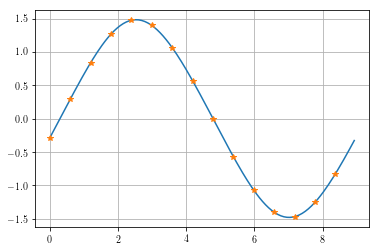

In [26]:
# Let's get a smoother response
time, xc = ms.time_history(t,x)
plt.plot(time,xc.T,t,x.T,'*')
plt.grid(True)
print('The average for this problem is known to be zero, we got', np.average(x))

In [27]:
def duff_osc2(x, v, params):
    omega = params['omega']
    t = params['cur_time']
    return np.array([[-x-.1*x**3-.1*v+1*sin(omega*t)]])

[[-0.14612264  0.63829325  1.2696969   1.49702578  1.19770733  0.53595158
  -0.25201989 -0.98812234 -1.4483167  -1.40829392 -0.89581254]] [[ 4.40357904e-09 -1.61587549e-10 -3.77641353e-08 -1.04853413e-07
  -9.77360614e-08 -3.04232008e-08  2.50133457e-09  8.36000086e-09
   8.23669376e-08  1.21675796e-07  6.64964815e-08]]
Constant term of FFT of signal should be zero:  (-1.3183114497938853e-05+0j)


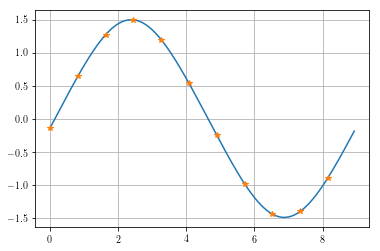

In [28]:
t, x, e, amps, phases, _ = ms.hb_time(duff_osc2, np.array([[0,1,-1]]), .7, num_harmonics=5)

print(x,e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])
time, xc = ms.time_history(t,x)

plt.plot(time, xc.T, t, x.T, '*')
plt.grid(True)

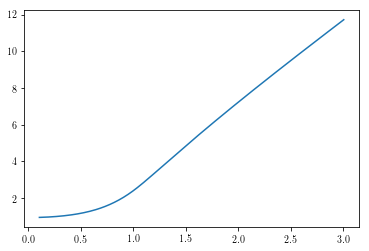

In [29]:
omega = np.linspace(0.1,3,200)+1/200
amp = np.zeros_like(omega)
x = np.array([[0,-1,1]])
for i, freq in enumerate(omega):
    # print(i,freq,x)
    try:
        t, x, e, amps, phases, _ = ms.hb_time(duff_osc2, x, omega = freq, num_harmonics = 1)# , callback = resid)
        # print(freq, amps, e)
        amp[i]=amps[0]
    except:
        amp[i] = np.nan    
plt.plot(omega, amp)

A simple solution is to change the starting guess to be away from the solution and see if it finds another one. Indeed that happens. 

/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.123545e-18
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.225758e-35
  gamma = solve(self.a, df_f)


Exception is  [[-14048.04211502 -23799.78052836  28150.85542711]]
Excepted- search failed for omega = 1.3300 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-14048.04211502, -23799.78052836,  28150.85542711]]),) ***


/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.884920e-21
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.673419e-24
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.349146e-18
  gamma = solve(self.a, df_f)


Exception is  [[-0.50117383 -1.47085558  1.76461524]]
Excepted- search failed for omega = 1.3250 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.50117383, -1.47085558,  1.76461524]]),) ***


/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.346858e-22
  gamma = solve(self.a, df_f)


Exception is  [[-149.31230514 -240.86584388  289.32925542]]
Excepted- search failed for omega = 1.3200 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-149.31230514, -240.86584388,  289.32925542]]),) ***


/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.682582e-27
  gamma = solve(self.a, df_f)


Exception is  [[ -860.37903099 -1380.82166224  1659.58827866]]
Excepted- search failed for omega = 1.3150 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[ -860.37903099, -1380.82166224,  1659.58827866]]),) ***
Exception is  [[-0.46917044 -1.41378355  1.71167874]]
Excepted- search failed for omega = 1.3100 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.46917044, -1.41378355,  1.71167874]]),) ***


/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.452034e-18
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.594031e-20
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.199128e-20
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition n

Exception is  [[-0.5484628  -1.38386656  1.75818205]]
Excepted- search failed for omega = 1.3050 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.5484628 , -1.38386656,  1.75818205]]),) ***
Exception is  [[-0.1498946  -1.52658689  1.55375167]]
Excepted- search failed for omega = 1.3000 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.1498946 , -1.52658689,  1.55375167]]),) ***
Exception is  [[-0.11357011 -1.51989956  1.52788042]]
Excepted- search failed for omega = 1.2950 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.11357011, -1.51989956,  1.52788042]]),) ***


/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.781157e-18
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.544966e-18
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.499759e-18
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition n

Exception is  [[ 101840.27779419  140857.99579895 -174070.52476789]]
Excepted- search failed for omega = 1.2900 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[ 101840.27779419,  140857.99579895, -174070.52476789]]),) ***
Exception is  [[-0.39373965 -1.35113527  1.6396133 ]]
Excepted- search failed for omega = 1.2850 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.39373965, -1.35113527,  1.6396133 ]]),) ***
Exception is  [[  852.72295757  1260.82993435 -1578.20796692]]
Excepted- search failed for omega = 1.2800 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[  852.72295757,  1260.82993435, -1578.20796692]]),) ***


/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.513585e-27
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.790850e-31
  gamma = solve(self.a, df_f)


Exception is  [[-17259.79734709 -23859.12392294  30406.21668773]]
Excepted- search failed for omega = 1.2750 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-17259.79734709, -23859.12392294,  30406.21668773]]),) ***


/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.669380e-23
  gamma = solve(self.a, df_f)


Exception is  [[-583.152231   -790.6684825  1011.54989141]]
Excepted- search failed for omega = 1.2700 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-583.152231  , -790.6684825 , 1011.54989141]]),) ***


/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.118378e-35
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.249606e-35
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.504506e-31
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition n

Exception is  [[-1.93963931 -1.05364039  2.11678323]]
Excepted- search failed for omega = 1.2650 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-1.93963931, -1.05364039,  2.11678323]]),) ***


/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.659386e-29
  gamma = solve(self.a, df_f)


Exception is  [[-5737.06724479 -8770.04720777 11288.89405129]]
Excepted- search failed for omega = 1.2600 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-5737.06724479, -8770.04720777, 11288.89405129]]),) ***
Exception is  [[-0.29123638 -1.28792434  1.49308243]]
Excepted- search failed for omega = 1.2550 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.29123638, -1.28792434,  1.49308243]]),) ***
Exception is  [[-0.3207039  -1.2695563   1.49962755]]
Excepted- search failed for omega = 1.2500 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.3207039 , -1.2695563 ,  1.49962755]]),) ***
Exception is  [[-0.22581457 -1.19643115 

/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.738193e-19
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.475581e-26
  gamma = solve(self.a, df_f)


Exception is  [[-897.55134598 -808.32853104 1385.62049817]]
Excepted- search failed for omega = 1.2350 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-897.55134598, -808.32853104, 1385.62049817]]),) ***
Exception is  [[ 1.9992692  -1.98343321  0.92141175]]
Excepted- search failed for omega = 1.2300 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[ 1.9992692 , -1.98343321,  0.92141175]]),) ***


/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.224080e-20
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.987021e-29
  gamma = solve(self.a, df_f)


Exception is  [[  798.09900332   928.18747314 -1249.13032353]]
Excepted- search failed for omega = 1.2250 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[  798.09900332,   928.18747314, -1249.13032353]]),) ***
Exception is  [[-0.00597303 -1.18451742  1.36565816]]
Excepted- search failed for omega = 1.2200 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.00597303, -1.18451742,  1.36565816]]),) ***
Exception is  [[-1.21092752 -0.85240429  1.61602125]]
Excepted- search failed for omega = 1.2150 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-1.21092752, -0.85240429,  1.61602125]]),) ***
Exception is  [[-0.65256288 -1.047232   

/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.075157e-17
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.458211e-17
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.121054e-17
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition n

Exception is  [[ -460.21495719 -4202.93740598  7114.88340927]]
Excepted- search failed for omega = 1.2000 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[ -460.21495719, -4202.93740598,  7114.88340927]]),) ***


/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.415100e-31
  gamma = solve(self.a, df_f)


Exception is  [[-52092.22630162  -4674.67820559  46589.90786447]]
Excepted- search failed for omega = 1.1950 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-52092.22630162,  -4674.67820559,  46589.90786447]]),) ***
Exception is  [[-0.05201374 -1.01591826  1.34051876]]
Excepted- search failed for omega = 1.1900 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.05201374, -1.01591826,  1.34051876]]),) ***
Exception is  [[-1.47458662 -0.6999901   1.64561541]]
Excepted- search failed for omega = 1.1850 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-1.47458662, -0.6999901 ,  1.64561541]]),) ***
Exception is  [[-2.30658583  1.861

/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.572163e-35
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.527097e-35
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.737366e-27
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition n

Exception is  [[-2.07301286 -0.4850604   1.99033026]]
Excepted- search failed for omega = 1.1750 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-2.07301286, -0.4850604 ,  1.99033026]]),) ***
Exception is  [[-0.58253913 -0.85255922  1.40038214]]
Excepted- search failed for omega = 1.1700 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.58253913, -0.85255922,  1.40038214]]),) ***


/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.058793e-24
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.288283e-26
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.047316e-26
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition n

Exception is  [[ -51.01565611 -237.59811776  289.12453873]]
Excepted- search failed for omega = 1.1650 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[ -51.01565611, -237.59811776,  289.12453873]]),) ***
Exception is  [[-0.2449792  -0.71966432  1.32944446]]
Excepted- search failed for omega = 1.1600 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.2449792 , -0.71966432,  1.32944446]]),) ***


/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.020024e-17
  gamma = solve(self.a, df_f)
/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:1121: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.938274e-17
  gamma = solve(self.a, df_f)


Exception is  [[ 1.33685689 -1.3024868   0.67246508]]
Excepted- search failed for omega = 1.1550 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[ 1.33685689, -1.3024868 ,  0.67246508]]),) ***


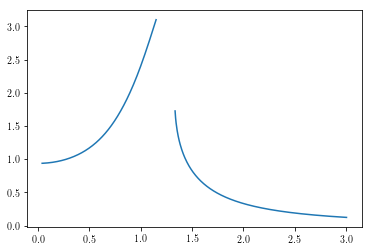

In [30]:
omegal = np.arange(3,.03,-1/200)+1/200
ampl = np.zeros_like(omegal)
x = np.array([[0,-1,1]])
#x = -x
for i, freq in enumerate(omegal):
    # Here we try to obtain solutions, but if they don't work, 
    # we ignore them by inserting `np.nan` values.
    x = x-sp.average(x)
    #x = np.array([[0,0,0]])
    try:
        t, x, e, amps, phases, _ = ms.hb_time(duff_osc2, x, freq, num_harmonics=1, method = 'anderson') #, callback = resid)
        ampl[i]=amps[0]
    except:
        ampl[i] = np.nan

plt.plot(omegal, ampl)

Exception is  [[-0.51278108 -1.48487717  1.77388473]]
Excepted- search failed for omega = 1.3300 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.51278108, -1.48487717,  1.77388473]]),) ***
Exception is  [[-0.51336039 -1.47651682  1.76615449]]
Excepted- search failed for omega = 1.3250 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.51336039, -1.47651682,  1.76615449]]),) ***
Exception is  [[-0.49305399 -1.46141777  1.75509695]]
Excepted- search failed for omega = 1.3200 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.49305399, -1.46141777,  1.75509695]]),) ***
Exception is  [[-0.44591749 -1.39583826  1.76525387]]
Exce

Exception is  [[-0.19977003 -1.13397154  1.4219081 ]]
Excepted- search failed for omega = 1.1950 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.19977003, -1.13397154,  1.4219081 ]]),) ***
Exception is  [[-0.18842616 -1.13063227  1.41196251]]
Excepted- search failed for omega = 1.1900 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.18842616, -1.13063227,  1.41196251]]),) ***
Exception is  [[-0.17514096 -1.12669534  1.40021497]]
Excepted- search failed for omega = 1.1850 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.17514096, -1.12669534,  1.40021497]]),) ***
Exception is  [[-0.16017346 -1.12257499  1.3871157 ]]
Exce

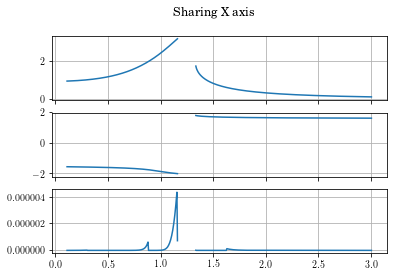

In [31]:
omegal = np.arange(3,.1,-1/200)+1/200
ampl = np.zeros_like(omegal)
phases1 = np.zeros_like(omegal)
e1 = np.zeros_like(omegal)
x = np.array([[0,-1,1]])*0
#x = -x
for i, freq in enumerate(omegal):
    # Here we try to obtain solutions, but if they don't work, 
    # we ignore them by inserting `np.nan` values.
    x = x-sp.average(x)
    #x = np.array([[0,0,0]])
    try:
        t, x, e, amps, phases, _ = ms.hb_time(duff_osc2, x, freq, num_harmonics=1, method = 'newton_krylov') #, callback = resid)
        ampl[i]=amps[0]
        phases1[i]=phases[0]
        e1[i]= e[0,0]
        #print('e = ', e[0,1])
    except:
        ampl[i] = np.nan
        phases1[i] = np.nan
        e1[i]=np.nan
        
f, axarr = plt.subplots(3, sharex=True)
f.suptitle('Sharing X axis')
axarr[0].plot(omegal, ampl)
axarr[0].grid(True)
axarr[1].plot(omegal, phases1)
axarr[1].grid(True)
axarr[2].plot(omegal, e1)
axarr[2].grid(True)

In [ ]:
omegal = np.arange(3,.1,-1/200)+1/200
ampl = np.zeros_like(omegal)
phases1 = np.zeros_like(omegal)
e1 = np.zeros_like(omegal)
x = np.array([[0,-1,1]])*0
#x = -x
for i, freq in enumerate(omegal):
    worked = False

    # Here we try to obtain solutions, but if they don't work, 
    # we ignore them by inserting `np.nan` values.
    x = x-sp.average(x)
    #x = np.array([[0,0,0]])
    tries = 0
    while worked is False and tries < 20:
        tries +=1
        try:
            x = np.random.rand(1,3)
            t, x, e, amps, phases, _ = ms.hb_time(duff_osc2, x, freq, num_harmonics=1, method = 'newton_krylov') #, callback = resid)
            ampl[i]=amps[0]
            phases1[i]=phases[0]
            e1[i]= e[0,0]
            #print('e = ', e[0,1])
            worked = True
        except:
            ampl[i] = np.nan
            phases1[i] = np.nan
            e1[i]=np.nan
        
f, axarr = plt.subplots(3, sharex=True)
f.suptitle('Sharing X axis')
axarr[0].plot(omegal, ampl)
axarr[0].grid(True)
axarr[1].plot(omegal, phases1)
axarr[1].grid(True)
axarr[2].plot(omegal, e1)
axarr[2].grid(True)

Exception is  [[-0.50840098 -1.48342383  1.77506958]]
Excepted- search failed for omega = 1.3300 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.50840098, -1.48342383,  1.77506958]]),) ***
Exception is  [[-0.50814841 -1.48370385  1.77486448]]
Excepted- search failed for omega = 1.3300 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.50814841, -1.48370385,  1.77486448]]),) ***
Exception is  [[-0.50772745 -1.48347536  1.77511621]]
Excepted- search failed for omega = 1.3300 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.50772745, -1.48347536,  1.77511621]]),) ***
Exception is  [[-0.50889296 -1.48643849  1.77853856]]
Exce

Exception is  [[-0.51481738 -1.47038264  1.75360822]]
Excepted- search failed for omega = 1.3250 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.51481738, -1.47038264,  1.75360822]]),) ***
Exception is  [[-0.51592882 -1.46579342  1.75726851]]
Excepted- search failed for omega = 1.3250 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.51592882, -1.46579342,  1.75726851]]),) ***
Exception is  [[-0.50334401 -1.47355071  1.76847297]]
Excepted- search failed for omega = 1.3250 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.50334401, -1.47355071,  1.76847297]]),) ***
Exception is  [[-0.53599206 -1.46702746  1.75772147]]
Exce

Exception is  [[-0.49262287 -1.44773583  1.74186562]]
Excepted- search failed for omega = 1.3200 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.49262287, -1.44773583,  1.74186562]]),) ***
Exception is  [[ 3.14132699 -1.11513683 -3.06292572]]
Excepted- search failed for omega = 1.3200 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[ 3.14132699, -1.11513683, -3.06292572]]),) ***
Exception is  [[-0.52735544 -1.46661855  1.73897833]]
Excepted- search failed for omega = 1.3200 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.52735544, -1.46661855,  1.73897833]]),) ***
Exception is  [[-0.49281545 -1.45262255  1.74228557]]
Exce

Exception is  [[-0.50331638 -1.43854575  1.73319842]]
Excepted- search failed for omega = 1.3100 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.50331638, -1.43854575,  1.73319842]]),) ***
Exception is  [[ 0.99043387  3.10896661 -3.28868333]]
Excepted- search failed for omega = 1.3100 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[ 0.99043387,  3.10896661, -3.28868333]]),) ***
Exception is  [[-0.46574902 -1.41350622  1.71058058]]
Excepted- search failed for omega = 1.3100 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.46574902, -1.41350622,  1.71058058]]),) ***
Exception is  [[-0.50741745 -1.41442725  1.70935355]]
Exce

Exception is  [[-0.5578675  -1.405796    1.69825749]]
Excepted- search failed for omega = 1.3050 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.5578675 , -1.405796  ,  1.69825749]]),) ***
Exception is  [[-0.44815197 -1.40135485  1.69227737]]
Excepted- search failed for omega = 1.3050 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.44815197, -1.40135485,  1.69227737]]),) ***
Exception is  [[ 0.95801297  3.07017117 -3.26148483]]
Excepted- search failed for omega = 1.3050 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[ 0.95801297,  3.07017117, -3.26148483]]),) ***
Exception is  [[-0.42299758 -1.41219271  1.68419691]]
Exce

Exception is  [[-0.13608134 -1.35226478  1.73660516]]
Excepted- search failed for omega = 1.3000 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.13608134, -1.35226478,  1.73660516]]),) ***
Exception is  [[-0.66924454 -1.3587211   1.70394519]]
Excepted- search failed for omega = 1.3000 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.66924454, -1.3587211 ,  1.70394519]]),) ***
Exception is  [[-0.44415876 -1.37232295  1.68984839]]
Excepted- search failed for omega = 1.3000 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.44415876, -1.37232295,  1.68984839]]),) ***
Exception is  [[ 9.61750939e-04 -1.31779264e+00  1.7760139

Exception is  [[-0.5813962  -1.21361838  1.81091344]]
Excepted- search failed for omega = 1.2900 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.5813962 , -1.21361838,  1.81091344]]),) ***
Exception is  [[-0.54309648 -1.24543951  1.74239882]]
Excepted- search failed for omega = 1.2900 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.54309648, -1.24543951,  1.74239882]]),) ***
Exception is  [[-0.52282087 -1.34841646  1.64792963]]
Excepted- search failed for omega = 1.2900 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.52282087, -1.34841646,  1.64792963]]),) ***
Exception is  [[-1.95499003 -1.15005379  2.41112177]]
Exce

Exception is  [[ 0.90024999  3.01889753 -3.1682361 ]]
Excepted- search failed for omega = 1.2850 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[ 0.90024999,  3.01889753, -3.1682361 ]]),) ***
Exception is  [[ 2.74789043 -1.02732663 -2.87844745]]
Excepted- search failed for omega = 1.2850 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[ 2.74789043, -1.02732663, -2.87844745]]),) ***
Exception is  [[-0.4283506  -1.30478702  1.65763824]]
Excepted- search failed for omega = 1.2850 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.4283506 , -1.30478702,  1.65763824]]),) ***
Exception is  [[-2.89098258  2.58438067  0.97788533]]
Exce

Exception is  [[-0.46554426 -1.19849486  1.77431442]]
Excepted- search failed for omega = 1.2800 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.46554426, -1.19849486,  1.77431442]]),) ***
Exception is  [[-0.20018147 -1.31441559  1.68996961]]
Excepted- search failed for omega = 1.2800 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.20018147, -1.31441559,  1.68996961]]),) ***
Exception is  [[-0.423545   -1.25058254  1.68289298]]
Excepted- search failed for omega = 1.2800 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.423545  , -1.25058254,  1.68289298]]),) ***
Exception is  [[-0.41526896 -1.3001234   1.62943225]]
Exce

Exception is  [[-0.05011558 -1.38026314  1.44812008]]
Excepted- search failed for omega = 1.2600 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.05011558, -1.38026314,  1.44812008]]),) ***
Exception is  [[-0.07955401 -1.22541332  1.60442736]]
Excepted- search failed for omega = 1.2600 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.07955401, -1.22541332,  1.60442736]]),) ***
Exception is  [[-0.19496516 -1.26963026  1.56425595]]
Excepted- search failed for omega = 1.2600 rad/s.
What ever error this is, please put into har_bal
               after the excepts (2 of them)
*** An exception of type NoConvergence occurred. Arguments:
(array([[-0.19496516, -1.26963026,  1.56425595]]),) ***
Exception is  [[-0.03060525 -1.25013476  1.57280748]]
Exce

In [ ]:
t, x, e, amps, phases, _ = ms.hb_time(duff_osc2, np.array([[0,  0.0,   0]]), 1.08, num_harmonics=1, method = 'newton_krylov') #, callback = resid)
        

In [ ]:
x = np.array([[0.,-1.,1.]])
x[0,0:3:1]


In [ ]:
plt.plot(omegal,ampl)
plt.plot(omega,amp)
#plt.axis([0,3, 0, 10.5])

In [ ]:
from scipy.optimize import newton_krylov

In [ ]:
def duff_amp_resid(a):
    return (mu**2+(sigma-3/8*alpha/omega_0*a**2)**2)*a**2-(k**2)/4/omega_0**2

In [ ]:
mu = 0.05 # damping
k = 1 # excitation amplitude
sigma = -0.9 #detuning
omega_0 = 1 # driving frequency
alpha = 0.1 # cubic coefficient

In [ ]:
newton_krylov(duff_amp_resid,-.1)

In [ ]:
sigmas = np.linspace(-1,3,200)
amplitudes = np.zeros_like(sigmas)
x = newton_krylov(duff_amp_resid,1)
for i, sigma in enumerate(sigmas):
    try:
        amplitudes[i] = newton_krylov(duff_amp_resid,x)
        x = amplitudes[i]
    except:
        amplitudes[i] = newton_krylov(duff_amp_resid,0)
        x = amplitudes[i]

plt.plot(sigmas,amplitudes)

In [ ]:
sigmas = np.linspace(-1,3,200)
sigmasr = sigmas[::-1]
amplitudesr = np.zeros_like(sigmas)
x = newton_krylov(duff_amp_resid,3)
for i, sigma in enumerate(sigmasr):
    try:
        amplitudesr[i] = newton_krylov(duff_amp_resid,x)
        x = amplitudesr[i]
    except:
        amplitudesr[i] = np.nan#newton_krylov(duff_amp_resid,0)
        x = amplitudesr[i]
        

plt.plot(sigmasr,amplitudesr)

In [ ]:
plt.plot(sigmasr,amplitudesr)
plt.plot(sigmas,amplitudes)

# Using lambda functions
As an aside, we can use a lambda function to solve a simple equation without much hassle. For example, $\ddot{x} + 0.1\dot{x}+ x + 0.1 x^3 = \sin(0.7t)$

In [ ]:
def duff_osc2(x, v, params):
    omega = params['omega']
    t = params['cur_time']
    return np.array([[-x-.1*x**3-.1*v+1*sin(omega*t)]])
_,_,_,a,_, _ = ms.hb_time(duff_osc2, np.array([[0,1,-1]]), 0.7, num_harmonics=1)
print(a)

In [ ]:
_,_,_,a,_, _ = ms.hb_time(lambda x,v, params:np.array([[-x-.1*x**3-.1*v+1*sin(0.7*params['cur_time'])]]), np.array([[0,1,-1]]), .7, num_harmonics=1)
a

Two things to note: 
1. Remember that the lambda function has to return an `n by 1` array. 
2. Time must be referenced as params['cur_time']